In [1]:
# Вариант 3. Набор данных - 5 / Классификаторы 1,3
#Цель лабораторной работы – получение навыков работы с методами классификации.

#1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
#2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
#3. Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)
#4. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
#5. Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
#6. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);
#7. Заполните пропущенные значения в данных;
#8. Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Оцените качество работы классификатора. 
#9. Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (auc, roc_curve, 
                             precision_recall_curve, 
                             average_precision_score)

In [2]:
#Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных
#survived: выживание (0 - Нет ;1 - Да)
#sex: пол (female - женский, male - мужской)
#age: возраст
#sibsp: число братьев, сестер, супругов на борту
#parch: число родителей и детей на борту
#ticket: номер билета
#fare: цена билета
#cabin:номер каюты
#embarked: порт погрузки (C = Cherbourg, Q = Queenstown, S = Southampton)
#boat: номер спасательной шлюпки
#body: идентификационный номер тела
#home.dest: дом.назначение

titanic_df = pd.read_csv('titanic3.csv',sep=';',decimal=',')
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
#Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

titanic_nonedupl = titanic_df.drop_duplicates()
titanic_nonedupl.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
print('Размер набора дынных до удаления дубликтов: ', titanic_df.shape)
print('Размер набора дынных после удаления дубликтов: ', titanic_nonedupl.shape)

Размер набора дынных до удаления дубликтов:  (1310, 14)
Размер набора дынных после удаления дубликтов:  (1310, 14)


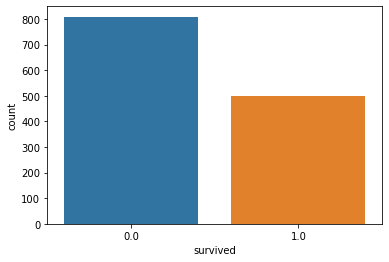

In [5]:
#Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)


sns.countplot(data=titanic_nonedupl, x=titanic_nonedupl['survived'])
plt.show()

In [6]:
#Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

titanic_nonedupl['pclass'] = titanic_nonedupl['pclass'].astype(str)
categorical_columns = [c for c in titanic_nonedupl.columns if titanic_nonedupl[c].dtype.name == 'object']
numerical_columns   = [c for c in titanic_nonedupl.columns if titanic_nonedupl[c].dtype.name != 'object']
print (f"Категориальные признаки: {categorical_columns}")
print (f"Числовые признаки: {numerical_columns}")

Категориальные признаки: ['pclass', 'name', 'sex', 'ticket', 'cabin', 'embarked', 'boat', 'home.dest']
Числовые признаки: ['survived', 'age', 'sibsp', 'parch', 'fare', 'body']


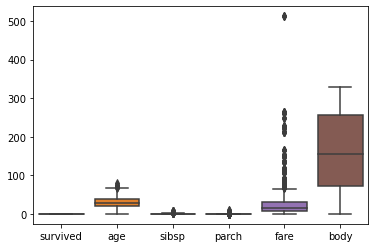

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [7]:

sns.boxplot(data = titanic_nonedupl[numerical_columns])
plt.show()
titanic_nonedupl.head()

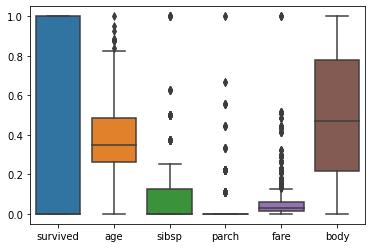

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,0.361169,0.000,0.000000,24160,0.412503,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.009395,0.125,0.222222,113781,0.295806,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,0.022964,0.125,0.222222,113781,0.295806,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,0.373695,0.125,0.222222,113781,0.295806,C22 C26,S,NaN,0.409786,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,0.311064,0.125,0.222222,113781,0.295806,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [8]:
scaler = preprocessing.MinMaxScaler()
titanic_nonedupl[numerical_columns] = scaler.fit_transform(titanic_nonedupl[numerical_columns].values.astype(float))
titanic_nonedupl[numerical_columns] = scaler.fit_transform(titanic_nonedupl[numerical_columns])
sns.boxplot(data=titanic_nonedupl[numerical_columns])
plt.show()
titanic_nonedupl.head()

In [9]:
#Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

lb_make = LabelEncoder()
titanic_nonedupl[categorical_columns] = titanic_nonedupl[categorical_columns].astype(str).apply(lb_make.fit_transform)
titanic_new = pd.concat((titanic_nonedupl[categorical_columns].astype(float), titanic_nonedupl[numerical_columns].astype(float)), axis=1)
titanic_new

,pclass,name,sex,ticket,cabin,embarked,boat,home.dest,survived,age,sibsp,parch,fare,body
0,0.0,21.0,0.0,187.0,43.0,2.0,11.0,308.0,1.0,0.361169,0.000,0.000000,0.412503,NaN
1,0.0,23.0,1.0,49.0,79.0,2.0,2.0,230.0,1.0,0.009395,0.125,0.222222,0.295806,NaN
2,0.0,24.0,0.0,49.0,79.0,2.0,27.0,230.0,0.0,0.022964,0.125,0.222222,0.295806,NaN
3,0.0,25.0,1.0,49.0,79.0,2.0,27.0,230.0,0.0,0.373695,0.125,0.222222,0.295806,0.409786
4,0.0,26.0,0.0,49.0,79.0,2.0,27.0,230.0,0.0,0.311064,0.125,0.222222,0.295806,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,2.0,1292.0,0.0,259.0,186.0,0.0,27.0,369.0,0.0,NaN,0.125,0.000000,0.028213,NaN
1306,2.0,1293.0,1.0,250.0,186.0,0.0,27.0,369.0,0.0,0.329854,0.000,0.000000,0.014102,0.926606
1307,2.0,1294.0,1.0,264.0,186.0,0.0,27.0,369.0,0.0,0.336117,0.000,0.000000,0.014102,NaN
1308,2.0,1295.0,1.0,346.0,186.0,2.0,27.0,369.0,0.0,0.361169,0.000,0.000000,0.015371,NaN


In [10]:
drop_columns = ['name', 'cabin', 'boat', 'home.dest', 'body', 'ticket']
titanic_new.drop(drop_columns, axis=1, inplace=True)
median_array = ['age','sibsp','parch','fare']
for i in median_array:
    titanic_new[i] = titanic_new[i].fillna(titanic_new[i].median())
titanic_new = titanic_new.dropna().reset_index(drop=True)
titanic_new

,pclass,sex,embarked,survived,age,sibsp,parch,fare
0,0.0,0.0,2.0,1.0,0.361169,0.000,0.000000,0.412503
1,0.0,1.0,2.0,1.0,0.009395,0.125,0.222222,0.295806
2,0.0,0.0,2.0,0.0,0.022964,0.125,0.222222,0.295806
3,0.0,1.0,2.0,0.0,0.373695,0.125,0.222222,0.295806
4,0.0,0.0,2.0,0.0,0.311064,0.125,0.222222,0.295806
...,...,...,...,...,...,...,...,...
1304,2.0,0.0,0.0,0.0,0.179540,0.125,0.000000,0.028213
1305,2.0,0.0,0.0,0.0,0.348643,0.125,0.000000,0.028213
1306,2.0,1.0,0.0,0.0,0.329854,0.000,0.000000,0.014102
1307,2.0,1.0,0.0,0.0,0.336117,0.000,0.000000,0.014102


,pclass,sex,embarked,survived,age,sibsp,parch,fare
pclass,1.000000,0.124617,0.182154,-0.312469,-0.377908,0.060832,0.018322,-0.558683
sex,0.124617,1.000000,0.095215,-0.528693,0.053664,-0.109609,-0.213125,-0.185681
embarked,0.182154,0.095215,1.000000,-0.172526,-0.060301,0.064519,0.043835,-0.235889


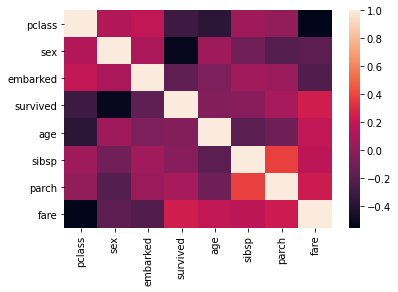

In [11]:
#Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других

sns.heatmap(titanic_new.corr())
titanic_new.corr().head(3)

In [12]:
#Заполните пропущенные значения в данных;

titanic_new.count()

pclass      1309
sex         1309
embarked    1309
survived    1309
age         1309
sibsp       1309
parch       1309
fare        1309
dtype: int64

In [13]:
#Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Оцените качество работы классификатора.

X, y = titanic_new.drop('survived', axis=1), titanic_new['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

In [14]:
#Линейный классификатор (персептрон)

slf = Perceptron()
paramsearch = GridSearchCV(estimator=slf, param_grid=dict(max_iter=[x for x in range(1,50)]), n_jobs=-1)
paramsearch.fit(X_train, y_train)
best_score = paramsearch.best_score_
selected_alpha = paramsearch.best_estimator_.alpha
selected_max_iter = paramsearch.best_estimator_.max_iter
print('Best score:',best_score)
perceptron = sk.linear_model.Perceptron(alpha=selected_alpha,max_iter=selected_max_iter)
perceptron.fit(X_train, y_train)
test_score  = np.mean(y_test == perceptron.predict(X_test))
print('Test score: ', test_score)

Best score: 0.7997181444509689
Test score:  0.7725190839694657


In [15]:
#Классификатор K ближайших соседей (задаётся количество ближайших объектов)

knn = KNeighborsClassifier()
params = {'n_neighbors': list(range(1, 50))}
knn_grid = GridSearchCV(knn, params)
knn_grid.fit(X_train, y_train)
best_num = knn_grid.best_estimator_.n_neighbors
best_score = knn_grid.best_score_

print('Best train score: ', best_score,
      '\tneighbors number: ', best_num)
rnc = KNeighborsClassifier(n_neighbors=best_num)
rnc.fit(X_train, y_train)
best_score  = np.mean(y_test  == rnc.predict(X_test))
print('Test score: ', best_score)

Best train score:  0.7981327069876688 	neighbors number:  23
Test score:  0.7893129770992366


In [ ]:
#Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

#Классификаторы персептрон и k ближайших соседей имеют примерно одинаковые показатели качества